In [1]:
# Import library yang dibutuhkan
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Load dataset Wine

Dataset ini berisi data kimiawi dari anggur yang diklasifikasikan dalam 13 fitur kimia seperti alkohol, kandungan asam dan flavonoid. Dataset ini memiliki 13 fitur dan 178 data.

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [5]:
X = X[y['class'] != 2]
y = y[y['class'] != 2]

## 2. Split Data (Train/Test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 3. Standarisasi Fitur

SVM bekerja lebih baik jika data distandarisasi:

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Linier SVM

In [11]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 5. Non-linear SVM

In [13]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 6. Prediksi dan Evaluasi

In [15]:
# Linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

Linear SVM Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
 [[18  0]
 [ 0 15]]


In [16]:
# RBF SVM
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

RBF SVM Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
 [[18  0]
 [ 0 15]]


## 7. (Opsional) Visualisasi Decision Boundary

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


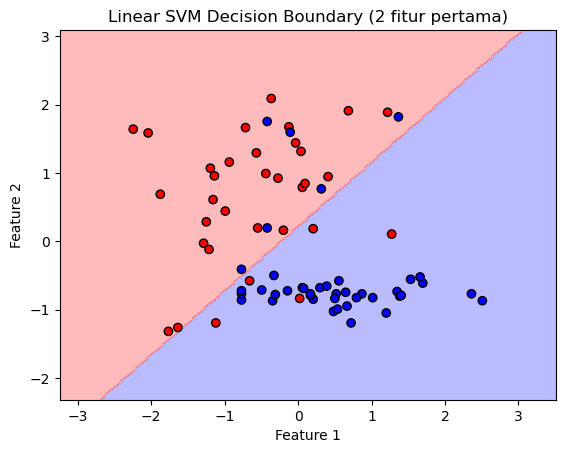

In [18]:
# Pilih dua fitur pertama untuk visualisasi
X_vis = X_train_scaled[:, :2]
X_test_vis = X_test_scaled[:, :2]

svm_vis = SVC(kernel='linear').fit(X_vis, y_train)

# Buat mesh grid
xx, yy = np.meshgrid(np.linspace(X_vis[:,0].min()-1, X_vis[:,0].max()+1, 200),
                     np.linspace(X_vis[:,1].min()-1, X_vis[:,1].max()+1, 200))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_train['class'], edgecolor='k', cmap='bwr')
plt.title("Linear SVM Decision Boundary (2 fitur pertama)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()